<a href="https://colab.research.google.com/github/vad-007/First_upload/blob/main/Python_face_detection_%26_Recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
faces.data.shape

(1348, 2914)

In [ ]:
faces.target_names.size

8

In [ ]:
np.unique(faces.target)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
faces.target_names[5]

'Hugo Chavez'

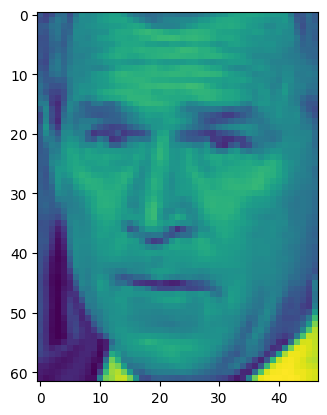

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(faces.images[1])

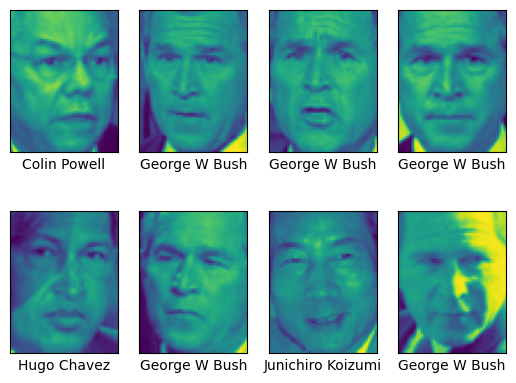

In [ ]:
fig,ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx])
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [ ]:
pcaModel=PCA(n_components=150,whiten=True,random_state=42)
svmModel=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pcaModel,svmModel)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(faces.data,faces.target,random_state=42,test_size=0.25)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [ ]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
mdl=grid.best_estimator_

In [ ]:
y_pred=mdl.predict(X_test)

In [ ]:
y_test

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 7, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 7, 1,
       3, 3, 5, 1, 1, 2, 7, 3, 5, 6, 7, 3, 7, 1, 7, 0, 4, 2, 4, 2, 5, 4,
       7, 3, 4, 3, 1, 3, 4, 1, 3, 5, 0, 4, 3, 3, 3, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 3, 2, 7, 3, 1, 7, 3, 3, 3, 3, 7, 3, 4, 3, 3, 0, 3, 7, 3,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 3, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 3, 3, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 1, 1,
       7, 1, 3, 7, 1, 4, 6, 1, 1, 3, 2, 3, 1, 7, 0, 2, 1, 7, 1, 3, 1, 1,
       1, 3, 3, 1, 1, 4, 1, 1, 7, 1, 1, 5, 3, 3, 3, 3, 4, 5, 6, 3, 7, 3,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 4, 3,
       1, 1, 5, 7, 7, 2, 2, 7, 5, 7, 1, 3, 3, 7, 3, 4, 7, 4, 3, 1, 3, 4,
       5, 1, 4, 3, 2, 1, 5, 3, 2, 3, 4, 1, 1, 1, 0, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 2, 1, 1, 3, 3, 1, 3, 4, 3, 1, 4, 1, 5, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 2, 2, 3, 6, 3, 1, 3, 5, 1,

In [ ]:
y_pred

array([3, 4, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 0, 3, 2, 1, 7, 2, 3, 2, 7, 7,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 2, 2, 3, 2, 7, 3, 2, 3, 3, 7, 1,
       3, 3, 0, 2, 1, 2, 7, 3, 7, 6, 7, 3, 7, 1, 7, 0, 4, 2, 7, 2, 5, 4,
       7, 3, 4, 1, 1, 5, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 7, 7, 3, 3, 1, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 7, 1, 3, 2, 7, 4, 7, 7, 5, 2, 3, 3, 3, 3, 2, 2, 3, 7,
       0, 3, 4, 3, 4, 1, 2, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 2, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 2, 3, 2, 3, 1, 7, 2, 2, 1, 7, 2, 3, 1, 1,
       1, 3, 3, 1, 0, 4, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 7, 5, 6, 3, 7, 4,
       3, 2, 0, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 4, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 7, 4, 4, 7, 2, 3, 1, 3, 4,
       3, 1, 4, 3, 1, 1, 5, 1, 2, 3, 4, 1, 1, 1, 2, 2, 3, 7, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 0, 0, 3, 2, 0,
       2, 5, 1, 3, 3, 6, 7, 2, 3, 6, 3, 1, 1, 5, 1,

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

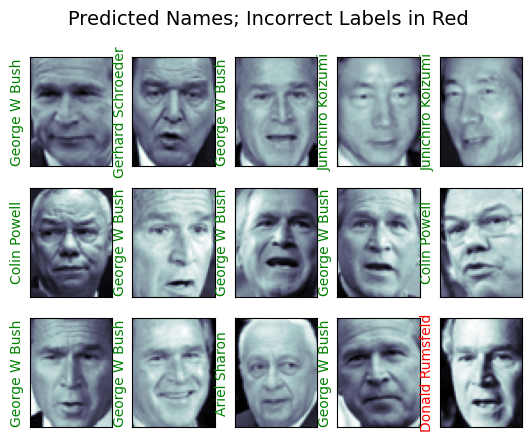

In [ ]:
fig,ax=plt.subplots(3,5)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(X_test[idx].reshape(62,47),cmap='bone')
    axidx.set(xticks=[],yticks=[])
    axidx.set_ylabel(faces.target_names[y_pred[idx]],color='green' if y_pred[idx]==y_test[idx] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

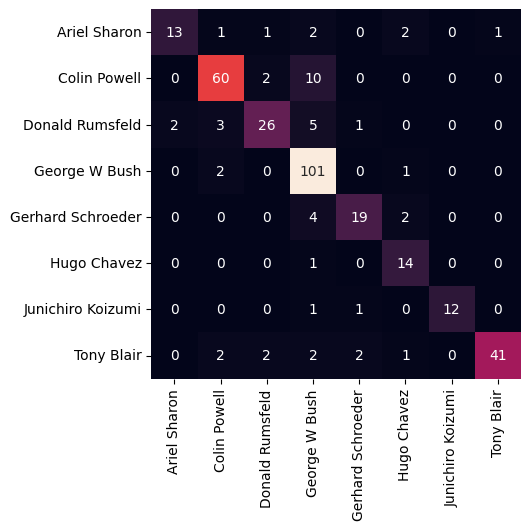

In [ ]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)